In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp


# Q 10
## Part 1

## Plot the feasible region

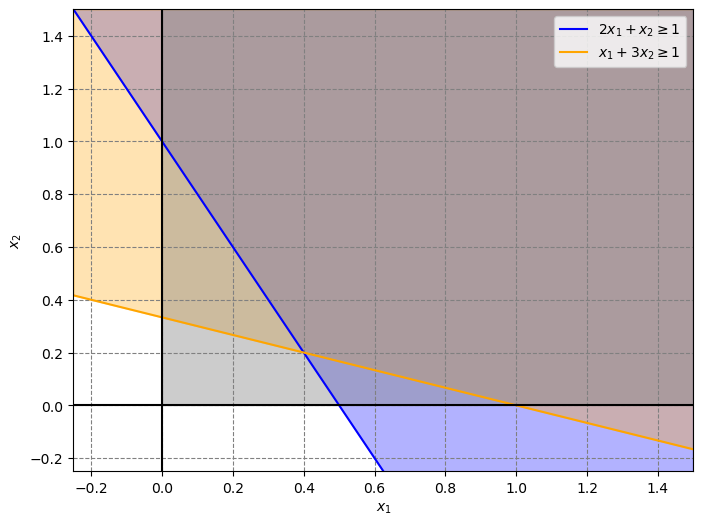

In [ ]:
x = np.linspace(-0.25, 1.5, 400)
y1 = (1 - 2 * x)  # Derived from 2x1 + x2 >= 1
y2 = (1 - x) / 3  # Derived from x1 + 3x2 >= 1

plt.figure(figsize=(8, 6))

plt.plot(x, y1, label=r'$2x_1 + x_2 \geq 1$', color='blue')
plt.fill_between(x, y1, 1.5, color='blue', alpha=0.3)

plt.plot(x, y2, label=r'$x_1 + 3x_2 \geq 1$', color='orange')
plt.fill_between(x, y2, 1.5, color='orange', alpha=0.3)


plt.fill_between(x, 0, 1.5, where=(x>=0), color='gray', alpha=0.4)


plt.xlim(-0.25, 1.5)
plt.ylim(-0.25, 1.5)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.show()

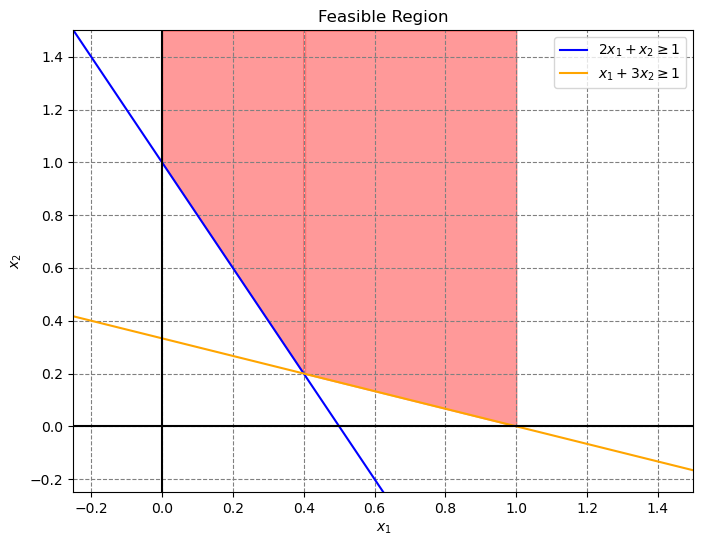

In [50]:
x = np.linspace(-0.25, 1.5, 400)
y1 = (1 - 2 * x)
y2 = (1 - x) / 3

plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$2x_1 + x_2 \geq 1$', color='blue')
plt.plot(x, y2, label=r'$x_1 + 3x_2 \geq 1$', color='orange')

plt.fill_between(x, y2, 1.5, where=(y2 >= y1) & (x>=0) & (y2>=0), color='red', alpha=0.4)
plt.fill_between(x, y1, 1.5, where=(y1 >= y2) & (x>=0) & (y1>=0), color='red', alpha=0.4)


plt.xlim(-0.25, 1.5)
plt.ylim(-0.25, 1.5)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.show()

## Part 2

In [54]:
x1 = cp.Variable(nonneg=True)
x2 = cp.Variable(nonneg=True)
constraints = [
    x1 + 3 * x2 >= 1,
    2 * x1 + x2 >= 1,
    x1 >= 0,
    x2 >= 0
]

### Problem 1

In [52]:
objective1 = cp.Minimize(x1 + x2)
prob1 = cp.Problem(objective1, constraints)
prob1.solve()
print("Problem 1: Minimize x1 + x2")
print(f"Optimal x1: {x1.value:.4f}, x2: {x2.value:.4f}")
print(f"Minimum value: {prob1.value:.4f}\n")

Problem 1: Minimize x1 + x2
Optimal x1: 0.4000, x2: 0.2000
Minimum value: 0.6000



### Problem 2

In [59]:
objective2 = cp.Minimize(-x1 - x2)
prob2 = cp.Problem(objective2, constraints)
prob2.solve()
print("Problem 2: Minimize -x1 - x2")
if prob2.status == cp.OPTIMAL:
    print(f"Optimal x1: {x1.value:.4f}, x2: {x2.value:.4f}")
else:
    print("Problem is unbounded")
print(f"Minimum value: {prob2.value:.4f}\n")

Problem 2: Minimize -x1 - x2
Problem is unbounded
Minimum value: -inf



### Problem 3

In [60]:
objective3 = cp.Minimize(x1)
prob3 = cp.Problem(objective3, constraints)
prob3.solve()
print("Problem 3: Minimize x1")
print(f"Optimal x1: {x1.value:.4f}, x2: {x2.value:.4f}")
print(f"Minimum value: {prob3.value:.4f}\n")

Problem 3: Minimize x1
Optimal x1: 0.0000, x2: 1.4314
Minimum value: 0.0000



### Problem 4

In [61]:
t = cp.Variable()
objective4 = cp.Minimize(t)
constraints4 = constraints + [t >= x1, t >= x2]
prob4 = cp.Problem(objective4, constraints4)
prob4.solve()
print("Problem 4: Minimize max{x1, x2}")
print(f"Optimal x1: {x1.value:.4f}, x2: {x2.value:.4f}")
print(f"Minimum value: {prob4.value:.4f}\n")

Problem 4: Minimize max{x1, x2}
Optimal x1: 0.3333, x2: 0.3333
Minimum value: 0.3333



### Problem 5

In [63]:
r = 2
q = 9
objective5 = cp.Minimize(cp.power(x1, r) + q * cp.power(x2, r))
prob5 = cp.Problem(objective5, constraints)
prob5.solve()
print(f"Problem 5: Minimize x1^{r} + {q}*x2^{r}")
print(f"Optimal x1: {x1.value:.4f}, x2: {x2.value:.4f}")
print(f"Minimum value: {prob5.value:.4f}")

Problem 5: Minimize x1^2 + 9*x2^2
Optimal x1: 0.5000, x2: 0.1667
Minimum value: 0.5000


# Q11
The optimization problem formulates as:
\begin{align*}
\text{minimize} \quad & x_{1}^2 + 3x_{2}^2
\\
\text{subject to} \quad & 2x_{1} + 3x_{2} \geq 1
\end{align*}
The lagrangian function is:
\begin{align*}
L(x_{1}, x_{2}, \lambda) = x_{1}^2 + 3x_{2}^2 + \lambda(1 - 2x_{1} - 3x_{2})
\end{align*}
The dual function is:
\begin{align*}
g(\lambda) = \inf_{x_{1}, x_{2}} x_{1}^2 + 3x_{2}^2 + \lambda(1 - 2x_{1} - 3x_{2})\\
\inf_{x_{1}, x_{2}} x_{1}^2 - 2\lambda x_{1} + 3x_{2}^2 - 3\lambda x_{2} + \lambda\\
= \inf_{x_{1}} x_{1}^2 - 2\lambda x_{1} + \inf_{x_{2}} 3x_{2}^2 - 3\lambda x_{2} + \lambda\\
= -\lambda^2 - \frac{3}{4} \lambda^2 + \lambda\\
= -\frac{7}{4} \lambda^2 + \lambda
\end{align*}


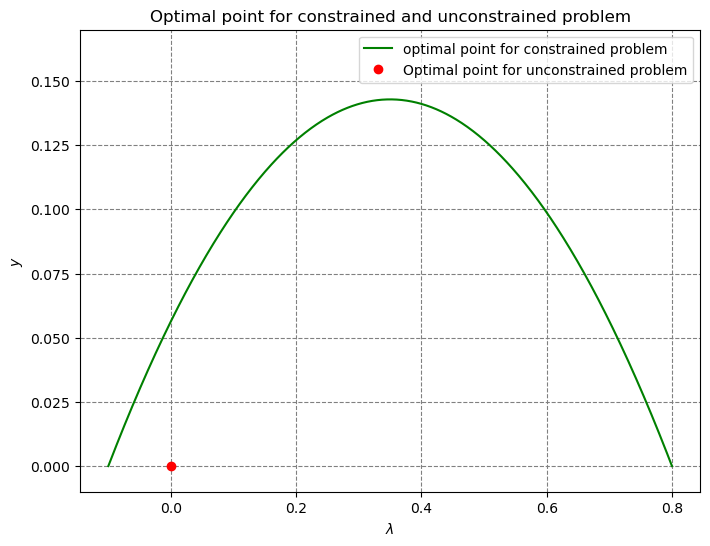

In [96]:
x = np.linspace(-0, 4/7, 800)
y = -7/4 * x**2 + x
x = np.linspace(-0.1, 0.8, 800)
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'optimal point for constrained problem', color='green')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$y$')
# Mark (0,0)
plt.plot(0, 0, 'ro', label='Optimal point for unconstrained problem')
plt.ylim(-0.01, 0.17)
plt.title('Optimal point for constrained and unconstrained problem')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.show()